# The MNIST digit classifier model
We're going to solve the `MNIST (Modified National Institute of Standards and Technology)[dataset]`digit classification problem with:
* `Multilayer Perceptron (MLP)`
* `Convolutional Neural Network (CNN)`
* `Recurrent Neural Network (RNN)`

### Multilayer Perceptron (MLP)
The first of the three networks we will be looking at is the MLP network. Let's
suppose that the objective is to create a neural network for identifying numbers
based on handwritten digits. For example, when the input to the network is an
image of a handwritten number 8, the corresponding prediction must also be
the digit 8. This is a classic job of classifier networks that can be trained using
logistic regression. 
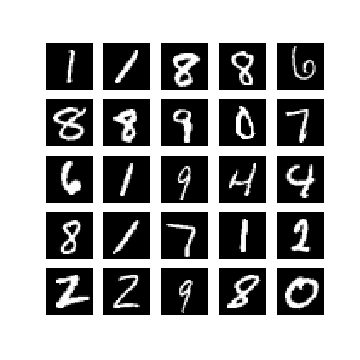
Each grayscale image is 28 × 28-pixels.

`The MNIST dataset` is a collection of handwritten digits ranging from 0 to 9. It has a training
set of 60,000 images, and 10,000 test images that are classified into corresponding
categories or labels

C:\Users\perpa\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\perpa\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\perpa\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\perpa\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

11493376/11490434 [==============================] - 1s 0us/step
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


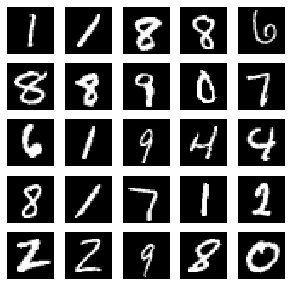

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.savefig("mnist-samples.png")
plt.show()
plt.close('all')

The following `Figure` shows how a 3×3 grayscale image is reshaped for MLP, CNN, and RNN input layers:
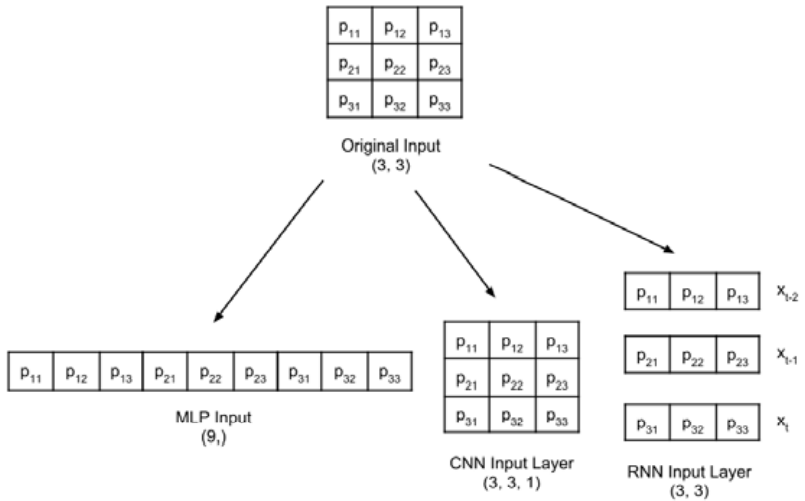
`The MLP MNIST digit classifier model:`
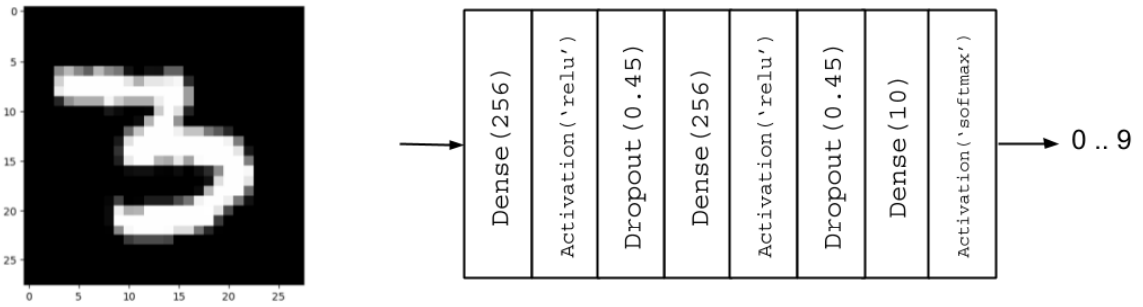
`The MLP MNIST digit classifier of fully connected layers.`
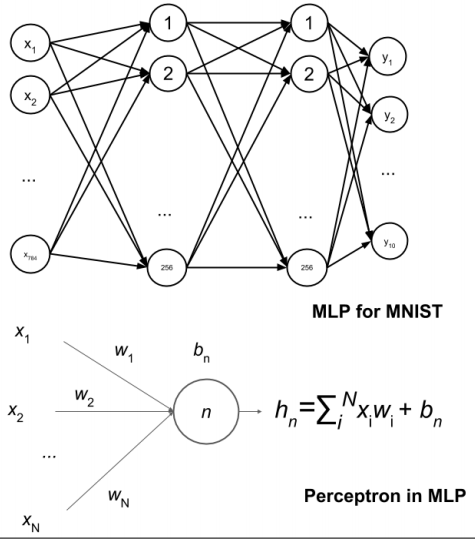

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size

# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
# Dropout layer randomly removes that fraction of units from participating in the
# next layer. For example, if the first layer has 256 units, after dropout = 0.45 is applied,
# only (1 - 0.45) * 256 units = 140 units from layer 1 participate in layer 2.
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
# dropout is not present during predictions
# it is only active during training
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
#
# enable this if pydot can be installed
# pip install pydot
#plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

### Convolutional Neural Network (CNN)
We are now going to move onto the second artificial neural network, CNN.Some changes in the previous
model will be needed to implement the CNN model. Instead of having an input
vector, the input tensor now has new dimensions `(height, width, channels)` or
`(image_size, image_size, 1) = (28, 28, 1)` for the grayscale MNIST images.

The CNN model for MNIST digit classification
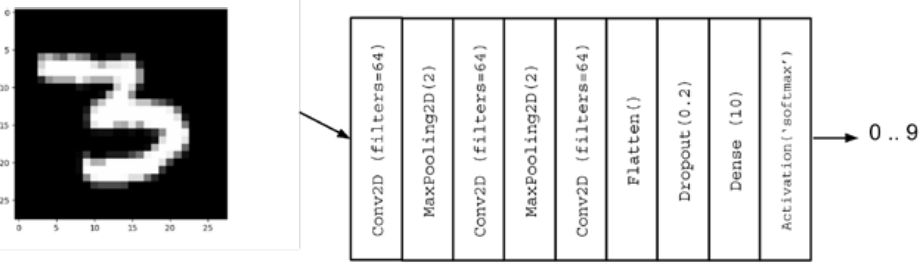

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# input image dimensions
image_size = x_train.shape[1]
# resize and normalize
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
# image is processed as is (square grayscale)
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

# model is a stack of CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())
# dropout added as regularizer
model.add(Dropout(dropout))
# output layer is 10-dim one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

# enable this if pydot can be installed
# pip install pydot
#plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


### Convolution
A 3 × 3 kernel is convolved with an MNIST digit image.
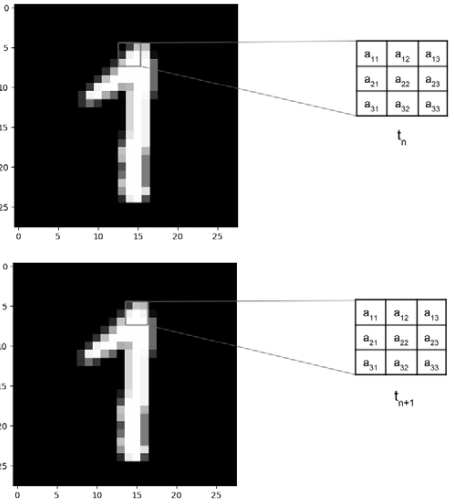
The convolution operation shows how one element of the feature map is computed
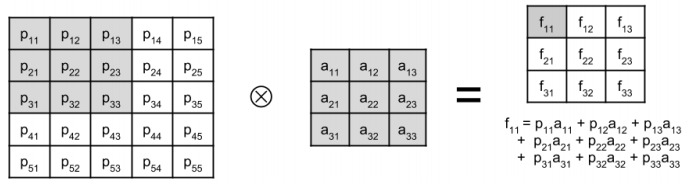

### Pooling operations
MaxPooling2D operation.
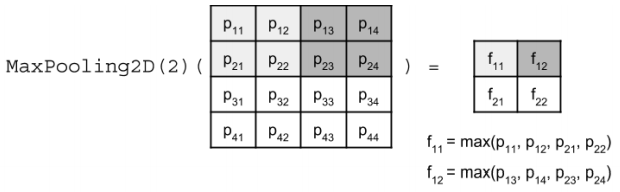

## Recurrent Neural Network (RNN)
We're now going to look at the last of our three artificial neural networks, RNN.
RNNs are a family of networks that are suitable for learning representations of
sequential data like text in `natural language processing (NLP)` or a stream of sensor
data in instrumentation. While each MNIST data sample is not sequential in nature,
it is not hard to imagine that every image can be interpreted as a sequence of rows
or columns of pixels.

`RNN model for MNIST digit classification`
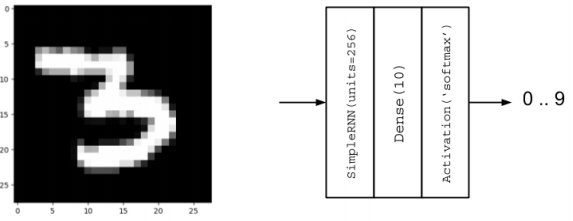

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, SimpleRNN
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# resize and normalize
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

# model is RNN with 256 units, input is 28-dim vector 28 timesteps
model = Sequential()
model.add(SimpleRNN(units=units,
                    dropout=dropout,
                    input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
# enable this if pydot can be installed
# pip install pydot
#plot_model(model, to_file='rnn-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


There are two main differences between the RNN classifier and the two previous
models. First is the `input_shape = (image_size, image_size)`, which is actually
`input_ shape = (timesteps, input_dim)` or a sequence of `input_dim` -dimension
vectors of timesteps length. Second is the use of a SimpleRNN layer to represent an
RNN cell with `units=256`. The units variable represents the number of output units.
If the CNN is characterized by the convolution of kernels across the input feature
map, the RNN output is a function not only of the present input but also of the
previous output or hidden state. Since the previous output is also a function of the
previous input, the current output is also a function of the previous output and input
and so on.

The following equation describes the output of SimpleRNN: 

`𝐡𝑡 = tanh(𝐛 + 𝐖𝐡𝑡−1 + 𝐔𝐱𝑡)`

In this equation,`b` is the bias, while `W` and `U` are called recurrent kernel (weights
for the previous output) and kernel (weights for the current input), respectively.
Subscript t is used to indicate the position in the sequence.

Diagram of SimpleRNN and RNN:
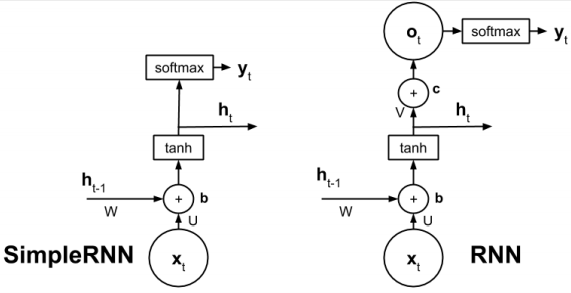

In many deep neural networks, other members of the RNN family are more
commonly used. For example,`Long Short-Term Memory (LSTM)` has been used
in both machine translation and question answering problems. LSTM addresses the
problem of long-term dependency or remembering relevant past information to the
present output.
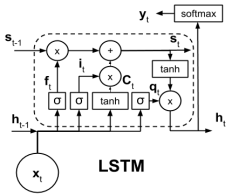

An intuitive guide to LSTMs can be found at http://colah.github.io/posts/2015-08-Understanding-LSTMs.
